# Scenerio Testing BHC Module

### Test Scenerios:

1) Simulated data clusters: Three component Gaussian mixture

2) Real data set presented in BHC paper: Glass data set

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy import linalg as la
from scipy import random as rnd
import matplotlib.pyplot as plt

import bhc

### Data Sets

**Three component Gaussian mixture:**

In [13]:
# bivariate gaussian params
mu1 = np.zeros(2)
cov1 = np.eye(2)

mu2 = np.array([5, 3])
cov2 = np.eye(2) * 2

mu3 = np.array([8, 12])
cov3 = np.array([3.4, 0, 0, 5.1]).reshape(2, 2)

# multinom params
p1 = 0.3
p2 = 0.4
p3 = 1 - p2 - p1

# number of total draws
draws = 100

In [14]:
# random draws
rnd.seed(1)

knum = rnd.multinomial(draws, (p1, p2, p3))

gaus1 = rnd.multivariate_normal(mu1, cov1, knum[0])
gaus2 = rnd.multivariate_normal(mu2, cov2, knum[1])
gaus3 = rnd.multivariate_normal(mu3, cov3, knum[2])

# join columns into dataframe
x1 = pd.Series(np.r_[gaus1[:, 0], gaus2[:, 0], gaus3[:, 0]])
x2 = pd.Series(np.r_[gaus1[:, 1], gaus2[:, 1], gaus3[:, 1]])
c = pd.Series(np.r_[np.zeros(knum[0]), np.ones(knum[1]), np.ones(knum[2]) * 2])
dat = {"x1" : x1, "x2" : x2, "c" : c}
clustData = pd.DataFrame(dat)

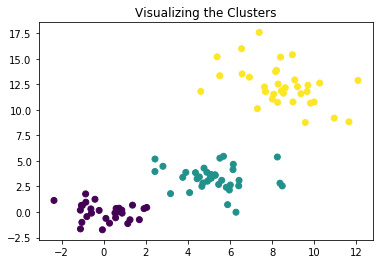

In [15]:
plt.scatter(clustData["x1"], clustData["x2"], c = clustData["c"])
plt.title("Visualizing the Clusters")
plt.show()

In [16]:
# priors distribution hyper-parameters
gcPriors = {
    "clusterConcentrationPrior" : {"alpha" : 2},
    "diffuseInvWishPrior" : {"df" : 10, "scale" : np.eye(2)}, # inv wishart params
    "diffuseNormPrior" : {"loc" : np.zeros(2),
                          "scale" : np.eye(2),
                          "meanscale" : 1}, # mvtnormal params
}

In [17]:
gc = clustData.values[:, :2]
gctree = bhc.HierarchyTree(X = gc, allParams = gcPriors)

In [18]:
gctree.grow_tree()

In [20]:
gctree.prune_tree()

In [21]:
gctree.tree_summary()

Summary for tier 0:
-------------------------------
Number of clusters: 100
  Cluster 0 size: 1
	 Posterior merge probability: 1.0
  Cluster 1 size: 1
	 Posterior merge probability: 1.0
  Cluster 2 size: 1
	 Posterior merge probability: 1.0
  Cluster 3 size: 1
	 Posterior merge probability: 1.0
  Cluster 4 size: 1
	 Posterior merge probability: 1.0
  Cluster 5 size: 1
	 Posterior merge probability: 1.0
  Cluster 6 size: 1
	 Posterior merge probability: 1.0
  Cluster 7 size: 1
	 Posterior merge probability: 1.0
  Cluster 8 size: 1
	 Posterior merge probability: 1.0
  Cluster 9 size: 1
	 Posterior merge probability: 1.0
  Cluster 10 size: 1
	 Posterior merge probability: 1.0
  Cluster 11 size: 1
	 Posterior merge probability: 1.0
  Cluster 12 size: 1
	 Posterior merge probability: 1.0
  Cluster 13 size: 1
	 Posterior merge probability: 1.0
  Cluster 14 size: 1
	 Posterior merge probability: 1.0
  Cluster 15 size: 1
	 Posterior merge probability: 1.0
  Cluster 16 size: 1
	 Posterior merge

**Glass Data Set:**

In [ ]:
glassurl = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
glasshead = ["ID", "RI", "Na", "Mg", "Al", "Si",
             "K", "Ca", "Ba", "Fe", "Type"]
glass = pd.read_csv(glassurl, names = glasshead, index_col = 0)
glass.head()

In [ ]:
fig, ax = plt.subplots(ncols = 3)
ax[0].scatter(glass["Al"], glass["RI"], c = glass["Type"])
ax[0].set_title("Al & RI")
ax[1].scatter(glass["Si"], glass["Na"], c = glass["Type"])
ax[1].set_title("Si & Na")
ax[2].scatter(glass["Al"], glass["Ca"], c = glass["Type"])
ax[2].set_title("Al & Ca")
plt.show()

**Data Set 3**